# Capstone Project - The Battle of Neighborhoods
### Applied Data Science Capstone by IBM

### 1. Introduction
An insurance company is trying to launch an office in New York city in one of the Boroughs to make profit at a minimum cost. 
There are five Borough categories; Bronx, Brooklyn, Manhattan, Queens and Staten Island. The company decided to pick one Borough location out of these five locations. 
For the insurance company's profitability and set insurance premium for the residents of New York city, and advocate a systems approach to road traffic safety that emphasizes involvement at all levels of the road traffic system, studying motor vehicle collisions statistics from public dataset for each Borough group is important.

The dataset contains collisions information on:

        - motorists
        
        - cyclists
        
        - pedestrians

The company is trying to answer which of the regions are better or worse in terms of number of injuries and fatalities?  

The dataset considered in this project falls within location data and we considered to create a map to visualize where the vehicle accidents data is placed in New York city and each neighborhood is clustered based on the most common venues. 


### 2. Data Description


-  The public dataset about motor vehicle collision was obtained from kaggle website and there are 29 variables and about 1.4 million records. Each record includes location coordinates and other feature variables, most notably the number of injuries and fatalities, segmented further by motorists, cyclists, and pedestrians.     



-  The selected feature variables important for this particular study are: Borough, Latitude, Longitude, number of persons injured, number of persons killed, number of pedestrians injured, number of pedestrians killed, number of cyclist injured, number of cyclist killed, number of motorist injured and number of motorist killed.   



-  After the dataset is processed and the missing values were removed and the duplicates deleted, the pandas data frame contains information on 124868 records out of this:
                    1. Brooklyn - 43602
                    2. Queens - 35364
                    3. Manhattan - 21882 
                    4. Bronx - 19231
                    5. Staten Island - 4789    



-  For a Borough that has the lowest number of people killed and injured, a Foursquare location data is used in order to get the most common venues in each neighborhood of given Borough in New York city and then we will use these features to cluster the Boroughs in to different cluster groups.       


 
-  The second dataset used to explore the neighborhoods and cluster them is presented using the following link. The data is structured from jason format to a pandas data frame for ease of manipulation to select the important features necessary for the analysis. The New York city geographical coordinates data will be explored using Foursquare API call, later will be used to grasp the venues information for each neighborhood in Staten Island.
 https://geo.nyu.edu/catalog/nyu_2451_34572
 


# 3. Statistical Methodology
-  Prior to utilizing the foursquare API the public dataset was used to obtain some useful insights in the structure of the data: descriptive statistics, Pearson correlation between different variables as well as graphical displays such as bar graph by borough, bar graph over time and pie charts were used, and the data was superimposed on a Folium map to see where it was placed on the map of New York City.  


-  Cluster analysis relate to grouping or segmenting records into subsets such that the pairwise similarities between those within each cluster are quite closely related to one another, while observations in different clusters are quite different.


-  We will be presenting one of the simpleset clustering algorithm the k-means which is vastly used for clustering in many data science applications, especially useful to quickly discover insights from unlabeled data. It is an effective approach for partitioning a data set into K distinct, non-overlapping clusters.


-  To perform K-means clustering, we must first specify the desired number of clusters K; then the K-means algorithm will assign each observation to exactly one of the K clusters (in this project we specified k=5). The K-means algorithm is intended for situations in which all variables are of quantitative type, and squared Euclidean distance is chosen as the dissimilarity measure


-  In order to perform k-means clustering, some decisions must be made:    
  
      1. Should the observations first be standardized in some way? 
    
    
      2. How many clusters should we look for in the data?  
  

# 4. Results

-  Descriptive statistics of the accidents at each borough for number of pedestrians injured, number of pedestrians killed, number of cyclists injured, number of cyclists killed, number of motorists injured and number of motorists killed. 


-  Different summary statistics such as mean, maximum value, the total number of accidents(sum) and the standard deviation for the selected factors by each borough category.  


-  Overall, considering these factors Staten Island has the smallest number of injury and deaths.

In [54]:
df.groupby('BOROUGH', axis=0).agg(['sum', 'mean', 'max', 'std'])[["NUM_PED_INJUR", "NUM_PED_KILL", "NUM_MOTOR_INJUR", "NUM_MOTOR_KILL", "NUM_CYC_INJUR", "NUM_CYC_KILL"]]

NUM_PED_INJUR                         NUM_PED_KILL            \
                        sum      mean max       std          sum      mean   
BOROUGH                                                                      
BRONX                  6193  0.322032   5  0.500891           44  0.002288   
BROOKLYN              12829  0.294230   7  0.485196          123  0.002821   
MANHATTAN              8690  0.397130  27  0.550496           85  0.003884   
QUEENS                 9130  0.258172   6  0.465441          105  0.002969   
STATEN ISLAND          1001  0.209021   6  0.437337           16  0.003341   

                            NUM_MOTOR_INJUR                          \
              max       std             sum      mean max       std   
BOROUGH                                                               
BRONX           2  0.048856           18772  0.976132  20  1.154386   
BROOKLYN        2  0.053896           39448  0.904729  24  1.093864   
MANHATTAN       6  0.072392           12607  0.576136  17  0.887009   
QUEENS          2  0.054927           35209  0.995617  30  1.059472   
STATEN ISLAND   2  0.061223            5436  1.135101  22  1.106636   

              NUM_MOTOR_KILL                         NUM_CYC_INJUR            \
                         sum      mean max       std           sum      mean   
BOROUGH                                                                        
BRONX                     32  0.001664   1  0.040759          1530  0.079559   
BROOKLYN                  59  0.001353   2  0.037988          6158  0.141232   
MANHATTAN                 15  0.000685   1  0.026174          4648  0.212412   
QUEENS                    69  0.001951   3  0.047820          3093  0.087462   
STATEN ISLAND             21  0.004385   1  0.066081           179  0.037377   

                            NUM_CYC_KILL                          
              max       std          sum      mean max       std  
BOROUGH                                                           
BRONX           3  0.274243            7  0.000364   1  0.019076  
BROOKLYN        3  0.350824           25  0.000573   1  0.023939  
MANHATTAN       3  0.412030           13  0.000594   2  0.026176  
QUEENS          3  0.286095           11  0.000311   1  0.017634  
STATEN ISLAND   2  0.190802            2  0.000418   1  0.020434

# Bar Graph - the numbers injured and killed by year

Text(0.5, 1.0, 'Number of cyclist kill')

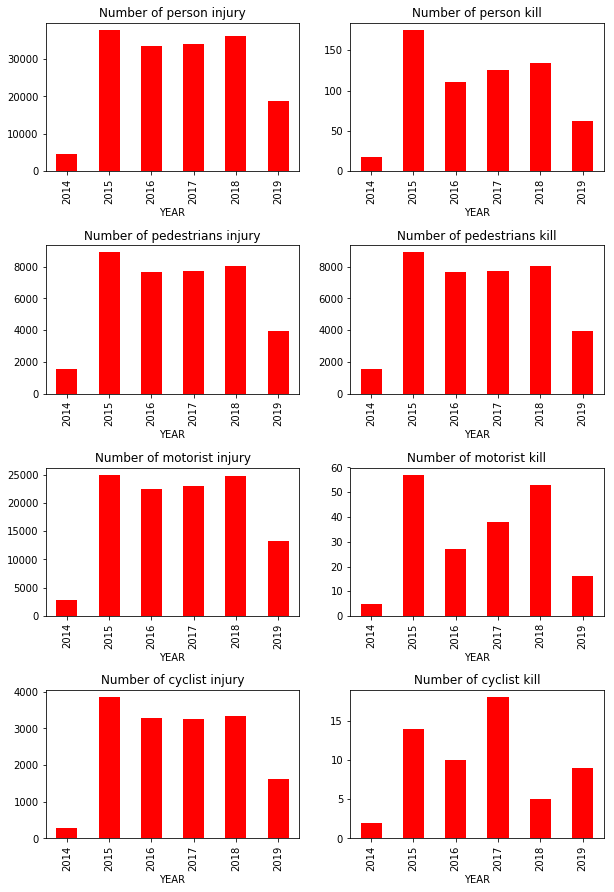

In [55]:
plt.figure(figsize=(10, 15)).subplots_adjust(hspace=0.5), plt.subplot(4, 2 ,1)
df.groupby('YEAR').NUM_PER_INJUR.sum().plot.bar(color='red').set_title('Number of person injury'), plt.subplot(4, 2, 2)
df.groupby('YEAR').NUM_PER_KILL.sum().plot.bar(color='red').set_title('Number of person kill'), plt.subplot(4, 2, 3)
df.groupby('YEAR').NUM_PED_INJUR.sum().plot.bar(color='red').set_title('Number of pedestrians injury'), plt.subplot(4, 2, 4)
df.groupby('YEAR').NUM_PED_INJUR.sum().plot.bar(color='red').set_title('Number of pedestrians kill'), plt.subplot(4, 2, 5)
df.groupby('YEAR').NUM_MOTOR_INJUR.sum().plot.bar(color='red').set_title('Number of motorist injury'), plt.subplot(4, 2, 6)
df.groupby('YEAR').NUM_MOTOR_KILL.sum().plot.bar(color='red').set_title('Number of motorist kill'), plt.subplot(4, 2, 7)
df.groupby('YEAR').NUM_CYC_INJUR.sum().plot.bar(color='red').set_title('Number of cyclist injury'), plt.subplot(4, 2, 8)
df.groupby('YEAR').NUM_CYC_KILL.sum().plot.bar(color='red').set_title('Number of cyclist kill')

# Bar Graph - the numbers injured and killed by borough

-  Staten Island has the smallest number of persons injured as well as killed considering pedestrians, cyclists and motorists.



-  Therefore this borough is used to explore the neighborhoods and search for the different venues in each neighborhood using foursquare API call.

Text(0.5, 1.0, 'Number of cyclist kill')

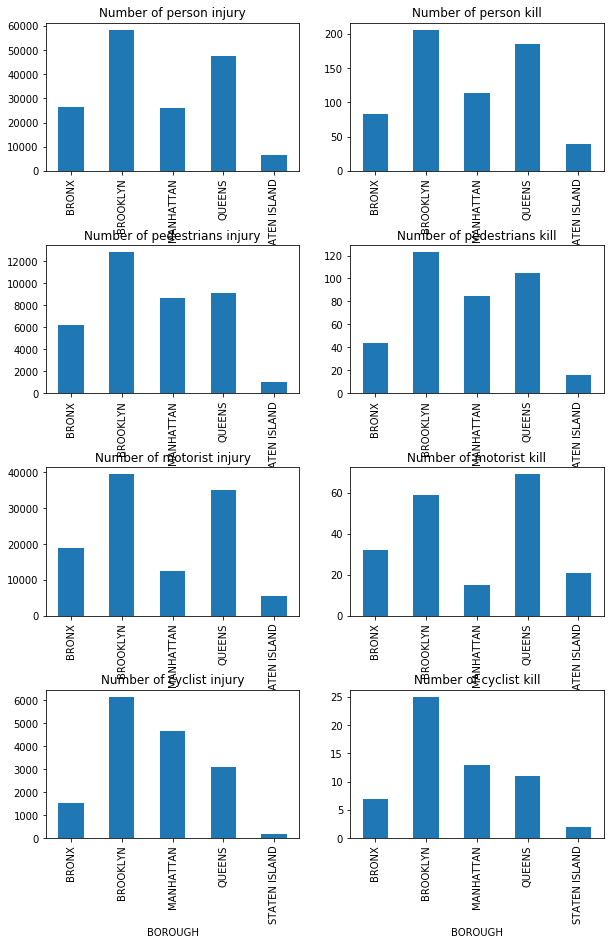

In [56]:
plt.figure(figsize=(10, 15)).subplots_adjust(hspace=0.5), plt.subplot(4, 2 ,1)
df.groupby('BOROUGH').NUM_PER_INJUR.sum().plot.bar().set_title('Number of person injury'), plt.subplot(4, 2, 2)
df.groupby('BOROUGH').NUM_PER_KILL.sum().plot.bar().set_title('Number of person kill'), plt.subplot(4, 2, 3)
df.groupby('BOROUGH').NUM_PED_INJUR.sum().plot.bar().set_title('Number of pedestrians injury'), plt.subplot(4, 2, 4)
df.groupby('BOROUGH').NUM_PED_KILL.sum().plot.bar().set_title('Number of pedestrians kill'), plt.subplot(4, 2, 5)
df.groupby('BOROUGH').NUM_MOTOR_INJUR.sum().plot.bar().set_title('Number of motorist injury'), plt.subplot(4, 2, 6)
df.groupby('BOROUGH').NUM_MOTOR_KILL.sum().plot.bar().set_title('Number of motorist kill'), plt.subplot(4, 2, 7)
df.groupby('BOROUGH').NUM_CYC_INJUR.sum().plot.bar().set_title('Number of cyclist injury'), plt.subplot(4, 2, 8)
df.groupby('BOROUGH').NUM_CYC_KILL.sum().plot.bar().set_title('Number of cyclist kill')

# Pie Chart - the number of pedestrians injured 

According to the pie chart, Staten Island accounts the lowest proportion of accidents. 

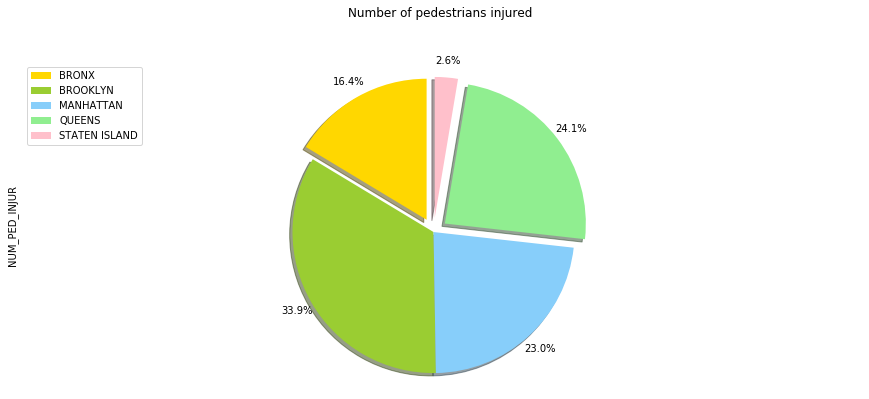

In [57]:
colors_list = ['gold', 'yellowgreen', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.
df_borough['NUM_PED_INJUR'].plot(kind='pie',figsize=(15, 6),autopct='%1.1f%%',startangle=90,shadow=True,labels=None,pctdistance=1.12,colors=colors_list,explode=explode_list)
plt.title('Number of pedestrians injured', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_borough.index, loc='upper left') 
plt.show()

# Scatter plot of number of motorist versus number of persons injured

Text(0, 0.5, 'number of motorists injured')

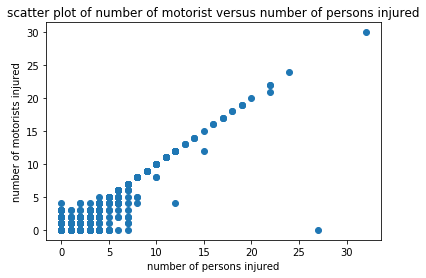

In [58]:
plt.scatter(df["NUM_PER_INJUR"], df["NUM_MOTOR_INJUR"])
plt.title("scatter plot of number of motorist versus number of persons injured")
plt.xlabel("number of persons injured")
plt.ylabel("number of motorists injured")

# Correlation Matrix

In [59]:
df[['NUM_PER_INJUR', 'NUM_PER_KILL', 'NUM_PED_INJUR', 'NUM_PED_KILL', 'NUM_CYC_INJUR', 'NUM_CYC_KILL', 'NUM_MOTOR_INJUR', 'NUM_MOTOR_KILL']].corr()  

,NUM_PER_INJUR,NUM_PER_KILL,NUM_PED_INJUR,NUM_PED_KILL,NUM_CYC_INJUR,NUM_CYC_KILL,NUM_MOTOR_INJUR,NUM_MOTOR_KILL
NUM_PER_INJUR,1.000000,-0.045319,-0.130552,-0.045317,-0.129823,-0.017002,0.872942,-0.011213
NUM_PER_KILL,-0.045319,1.000000,-0.011713,0.788259,-0.020409,0.346812,-0.023313,0.548353
NUM_PED_INJUR,-0.130552,-0.011713,1.000000,0.000270,-0.224594,-0.002640,-0.492941,-0.020584
NUM_PED_KILL,-0.045317,0.788259,0.000270,1.000000,-0.016559,0.075249,-0.030039,0.011563
NUM_CYC_INJUR,-0.129823,-0.020409,-0.224594,-0.016559,1.000000,-0.000274,-0.307898,-0.014282
NUM_CYC_KILL,-0.017002,0.346812,-0.002640,0.075249,-0.000274,1.000000,-0.011852,-0.000808
NUM_MOTOR_INJUR,0.872942,-0.023313,-0.492941,-0.030039,-0.307898,-0.011852,1.000000,0.005447
NUM_MOTOR_KILL,-0.011213,0.548353,-0.020584,0.011563,-0.014282,-0.000808,0.005447,1.000000


In [60]:
NYC_map.add_child(accidents)

# Exploring neighborhoods




**The following informations are presented in the table bellow:**

    - The names of the neighborhoods together with their latitude and longitude

    - The venues names within each neighborhood, the venues latitudes, longitudes and the venue categories


In [61]:
StatenIsland_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,St. George,40.644982,-74.079353,A&S Pizzeria,40.643940,-74.077626,Pizza Place
1,St. George,40.644982,-74.079353,Beso,40.643306,-74.076508,Tapas Restaurant
2,St. George,40.644982,-74.079353,Staten Island September 11 Memorial,40.646767,-74.076510,Monument / Landmark
3,St. George,40.644982,-74.079353,Richmond County Bank Ballpark,40.645056,-74.076864,Baseball Stadium
4,St. George,40.644982,-74.079353,St. George Theatre,40.642253,-74.077496,Theater



**The following informations are presented in the table bellow:**
    
    - The names of the neighborhoods together with their latitude and longitude
    
    - The cluster labels
    
    - A list of the top 10 most common venues within a radius of 500 meters in Staten Island. 



In [69]:
StatenIsland_merged.head(2)

,Borough,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Staten Island,St. George,40.644982,-74.079353,1,Clothing Store,Bar,Pizza Place,Italian Restaurant,Harbor / Marina,Fast Food Restaurant,Plaza,Steakhouse,Scenic Lookout,Coffee Shop
1,Staten Island,New Brighton,40.640615,-74.087017,2,Bus Stop,Park,Bowling Alley,Deli / Bodega,Convenience Store,Construction & Landscaping,Playground,Discount Store,Hookah Bar,Ice Cream Shop


# Visualizing the clustered neighborhoods on a map



    - The k-means algorithm is applied to cluster the neighborhoods to the one-hot encoded venue dataset under the assumption that there are five clusters, the  clusters are shown in the above output and the map below presents the same result.

    - The following visualization shows the clustered neighborhoods and the clusters can easily be accessed to see which neighborhoods are assigned which cluster among the five clusters. We can see that most of the neighborhoods are assigned gray clusters which is cluster two.


In [63]:
map_clusters

### Cluster 1
In this part we will examine each cluster and determine the venue categories that distinguish each cluster. When we look at this cluster, the only neiborhood is Emerson Hill which consists of the venues; Sculpture Garden, Zoo Exhibit, Fast Food Restaurant, Gas Station, Furniture / Home Store, French Restaurant, Food Truck, Food & Drink Shop, Flower Shop and Filipino Restaurant.

In [73]:
StatenIsland_merged.loc[StatenIsland_merged['Cluster_Labels'] == 0, StatenIsland_merged.columns[[1] + list(range(5, StatenIsland_merged.shape[1]))]].head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Emerson Hill,Sculpture Garden,Zoo Exhibit,Fast Food Restaurant,Gas Station,Furniture / Home Store,French Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop


### Cluster 2
This cluster group has the biggest number of neighborhoods in it, 46 out of 62 neighborhoods are grouped here. The most common venues in these neighborhoods are Construction & Landscaping, restaurants, bus stop, stores (Liquor store, accessories store, Discount store music store and Grocery Store) Monument / Landmark and Athletics & Sports.

In [74]:
StatenIsland_merged.loc[StatenIsland_merged['Cluster_Labels'] == 1, StatenIsland_merged.columns[[1] + list(range(5, StatenIsland_merged.shape[1]))]].head(2)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,St. George,Clothing Store,Bar,Pizza Place,Italian Restaurant,Harbor / Marina,Fast Food Restaurant,Plaza,Steakhouse,Scenic Lookout,Coffee Shop
2,Stapleton,Pizza Place,Restaurant,Sandwich Place,Discount Store,Bank,Mexican Restaurant,Spanish Restaurant,Fast Food Restaurant,Skate Park,New American Restaurant


### Cluster 3
Out of the 62 neighborhoods that are found in Staten Island, 13 of them are in this cluster. When we look at these neighborhoods, the most common venues found in these neighborhoods are bus stop, restaurants such as Italian restaurant, French restaurant, Filipino Restaurant, Food & Drink Shop; stores etc...

In [75]:
StatenIsland_merged.loc[StatenIsland_merged['Cluster_Labels'] == 2, StatenIsland_merged.columns[[1] + list(range(5, StatenIsland_merged.shape[1]))]].head(2)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,New Brighton,Bus Stop,Park,Bowling Alley,Deli / Bodega,Convenience Store,Construction & Landscaping,Playground,Discount Store,Hookah Bar,Ice Cream Shop
6,Todt Hill,Park,Zoo Exhibit,German Restaurant,Gas Station,Furniture / Home Store,French Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop


### Cluster 4

When we look at this cluster, the only neiborhood is Port Ivory which consists of the venues; Bar, Zoo Exhibit, Filipino Restaurant,  Gastropub, Gas Station, French Restaurant, Food Truck, Food & Drink Shop.

In [71]:
StatenIsland_merged.loc[StatenIsland_merged['Cluster_Labels'] == 3, StatenIsland_merged.columns[[1] + list(range(5, StatenIsland_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Port Ivory,Bar,Zoo Exhibit,Filipino Restaurant,Gastropub,Gas Station,Furniture / Home Store,French Restaurant,Food Truck,Food & Drink Shop,Food


### Cluster 5
When we look at this cluster, the only neighborhood is Graniteville which consists of the venues; Supermarket, German Restaurant, Gastropub, Furniture / Home Store, French Restaurant, Food Truck, Food & Drink Shop, Food and Flower Shop .

In [76]:
StatenIsland_merged.loc[StatenIsland_merged['Cluster_Labels'] == 4, StatenIsland_merged.columns[[1] + list(range(5, StatenIsland_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Graniteville,Supermarket,German Restaurant,Gastropub,Gas Station,Furniture / Home Store,French Restaurant,Food Truck,Food & Drink Shop,Food,Flower Shop


## 5. Discussion and Conclusion

- In this study we compared the motor vehicle collisions data of New York city by borough category. The objective of this project was to select one borough among five boroughs and to use foursquare API to search for the most common venues for each neighborhood based on a given borough. 


- In order to address the objective of the study, we have considered descriptive statistics as well as graphical displays such as bar graphs, pie charts, scatter plots and using Folium maps. 


- This analysis showed Staten Island has the lowest number of injuries and deaths. 


- To undertake clustering we used K-means algorithm with a pre-specified number of five cluster groups.


- The ten most common venues for each neighborhood in Staten Island are were selected and this feature was used to cluster the neighborhoods in to five groups.


- Once the borough with the lowest fatalities and injuries was chosen, the insurance company can choose any neighborhood based on the interest of the availabe venues.


- Based on the analysis, we can conclude that this analysis helps the insurance company get a better understanding of the neighborhoods with respect to the most common venues. The choice of venues depend on the interest of the insurance company what they want to select in a neighborhood. For instance, if they would like a neighborhood with restaurants, bus stops, rental car locations, hotels, stores, history museum and electronics stores definately cluster four would be the one chosen. If the most common venues the insurer wants are banks, sports clubs, pharmacy, park, beach and IT services; cluster one would be the primary choice.